<a href="https://colab.research.google.com/github/litawandani/TugasPratikumML_234-244/blob/main/Model_3_fix_(Inception_V3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Praktikum"

In [ ]:
%cd /content/drive/MyDrive/Praktikum

/content/drive/MyDrive/Praktikum


In [ ]:
!ls  

'Alzheimer_s Dataset'   dataset_model   model_1.tflite
 dataset	        kaggle.json     model.h5


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 88% 30.0M/34.1M [00:00<00:00, 82.8MB/s]
100% 34.1M/34.1M [00:00<00:00, 85.4MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
from distutils.dir_util import copy_tree, remove_tree

base_dir = "/content/drive/My Drive/Praktikum/Alzheimer_s Dataset"
root_dir = "./"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
  remove_tree (work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
!pip install split_folders
import splitfolders

src = "/content/drive/My Drive/Praktikum/dataset"
base_dir = "/content/drive/My Drive/Praktikum/dataset_split"

splitfolders.ratio(src, output = base_dir, seed=240, ratio=(0.8,0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.71 files/s]
Copying files: 2 files [00:00,  3.48 files/s]
Copying files: 3 files [00:00,  3.55 files/s]
Copying files: 4 files [00:01,  3.35 files/s]
Copying files: 5 files [00:01,  3.29 files/s]
Copying files: 6 files [00:01,  3.33 files/s]
Copying files: 7 files [00:02,  3.08 files/s]
Copying files: 8 files [00:02,  2.93 files/s]
Copying files: 9 files [00:02,  3.22 files/s]
Copying files: 10 files [00:08,  1.97s/ files]
Copying files: 20 files [00:08,  2.68 files/s]
Copying files: 32 files [00:08,  6.22 files/s]
Copying files: 44 files [00:08, 10.90 files/s]
Copying files: 56 files [00:08, 16.94 files/s]
Copying files: 72 files [00:08, 27.39 files/s]
Copying files: 85 files [00:09, 37.06 files/s]
Copying files: 98 files [00:09, 47.87 files/s]
Copying files: 110 files [00:09, 57.91 files/s]
Copying files: 122 files [00:09, 68.39 files/s]
Copying files: 134 files [00:09, 76.79 files/s]
Copying files: 146 file

In [ ]:
base_dir = "/content/drive/My Drive/Praktikum/dataset_split"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

MildDem_train_dir = os.path.join(train_dir, 'MildDemented')
ModDem_train_dir = os.path.join(train_dir, 'ModerateDemented')
NonDem_train_dir = os.path.join(train_dir, 'NonDemented')
VermilDem_train_dir = os.path.join(train_dir, 'VeryMildDemented')

MildDem_val_dir = os.path.join(validation_dir, 'MildDemented')
ModDem_val_dir = os.path.join(validation_dir, 'ModerateDemented')
NonDem_val_dir = os.path.join(validation_dir, 'NonDemented')
VermilDem_val_dir = os.path.join(validation_dir, 'VeryMildDemented')

In [ ]:
print('total training MildDemented images :', len(os.listdir(MildDem_train_dir)))
print('total training ModerateDemented images :', len(os.listdir(ModDem_train_dir)))
print('total training NonDemented images :', len(os.listdir(NonDem_train_dir)))
print('total training VeryMildDemented images :', len(os.listdir(VermilDem_train_dir)))

print('\ntotal validation MildDemented images :', len(os.listdir(MildDem_val_dir)))
print('total validation ModerateDemented images :', len(os.listdir(ModDem_val_dir)))
print('total validation NonDemented images :', len(os.listdir(NonDem_val_dir)))
print('total validation VeryMildDemented images :', len(os.listdir(VermilDem_val_dir)))

total training MildDemented images : 716
total training ModerateDemented images : 51
total training NonDemented images : 2560
total training VeryMildDemented images : 1792

total validation MildDemented images : 180
total validation ModerateDemented images : 13
total validation NonDemented images : 640
total validation VeryMildDemented images : 448


#Augmentasi Data

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 200
width = 200
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 5119 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


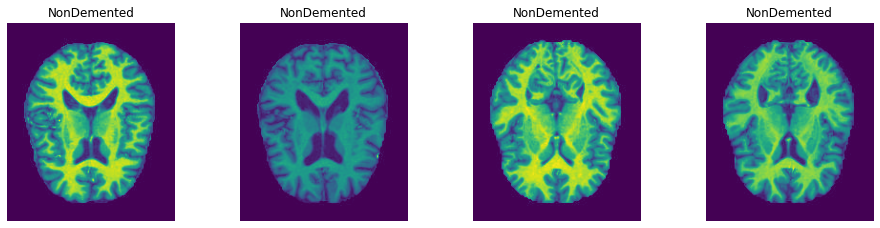

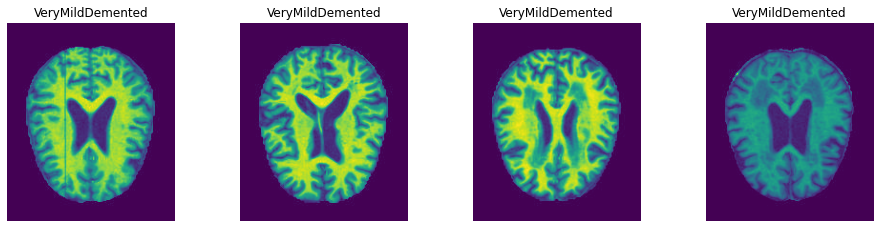

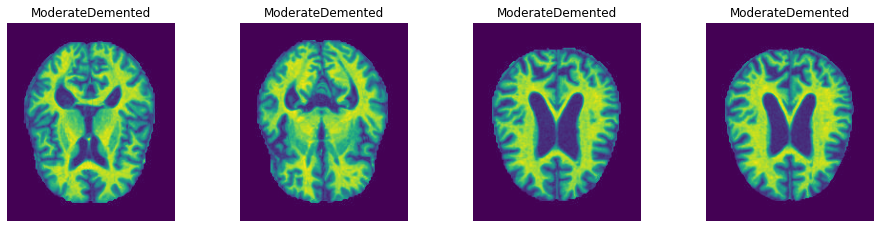

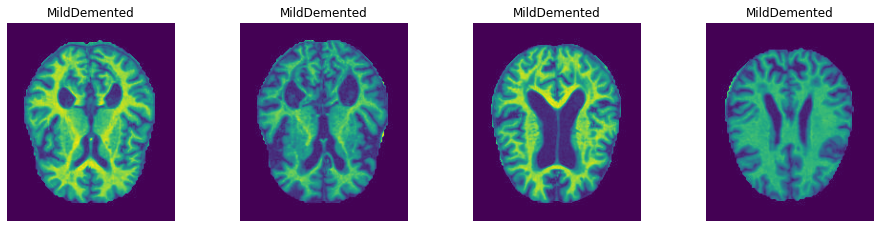

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

NonDemented_images = os.listdir(NonDem_train_dir)
VeryMildDemented_images = os.listdir(VermilDem_train_dir)
ModerateDemented_images = os.listdir(ModDem_train_dir)
MildDemented_images = os.listdir(MildDem_train_dir)

fname1 = [os.path.join(NonDem_train_dir,fname)
        for fname in NonDemented_images[:4]]

fname2 = [os.path.join(VermilDem_train_dir,fname)
        for fname in VeryMildDemented_images[:4]]

fname3 = [os.path.join(ModDem_train_dir,fname)
        for fname in ModerateDemented_images[:4]]

fname4 = [os.path.join(MildDem_train_dir,fname)
        for fname in MildDemented_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('NonDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('VeryMildDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('ModerateDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('MildDemented')
    plt.imshow(img)
plt.show()

#Preprocessing

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (200,200))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (200,200))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Val Data = ", val_data.shape)
print("Val Label = ", val_label.shape)

Train Data =  (5119, 200, 200, 3)
Train Label =  (5119,)
Val Data =  (1281, 200, 200, 3)
Val Label =  (1281,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented'
 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]


#Modelling

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
base_model = InceptionV3(include_top=False,
                         input_shape = (200, 200, 3),
                         weights = 'imagenet',
                         pooling = max)

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)                 
x = layers.Dense(4, activation='softmax')(x)

In [ ]:
model = Model(base_model.input, x)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 99, 99, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 99, 99, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.97:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

CALLBACKS = [my_callback]

model.compile(optimizer=Adam(learning_rate=0.0001, decay=0.0001/32), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
history = model.fit(train_generator, batch_size = 32, epochs = 150, validation_data=val_generator, callbacks=CALLBACKS)

Epoch 1/150
160/160 [==============================] - 120s 727ms/step - loss: 0.8431 - acc: 0.5905 - val_loss: 0.8171 - val_acc: 0.6144
Epoch 2/150
160/160 [==============================] - 56s 349ms/step - loss: 0.8277 - acc: 0.5962 - val_loss: 0.8194 - val_acc: 0.6003
Epoch 3/150
160/160 [==============================] - 56s 349ms/step - loss: 0.8273 - acc: 0.5950 - val_loss: 0.8021 - val_acc: 0.6120
Epoch 4/150
160/160 [==============================] - 55s 345ms/step - loss: 0.8139 - acc: 0.6109 - val_loss: 0.8026 - val_acc: 0.6073
Epoch 5/150
160/160 [==============================] - 55s 343ms/step - loss: 0.8065 - acc: 0.6087 - val_loss: 0.7839 - val_acc: 0.6230
Epoch 6/150
160/160 [==============================] - 55s 345ms/step - loss: 0.8029 - acc: 0.6118 - val_loss: 0.8006 - val_acc: 0.6339
Epoch 7/150
160/160 [==============================] - 55s 344ms/step - loss: 0.7915 - acc: 0.6273 - val_loss: 0.7819 - val_acc: 0.6292
Epoch 8/150
160/160 [==========================

In [ ]:
model.save('model_1.h5')

#Result

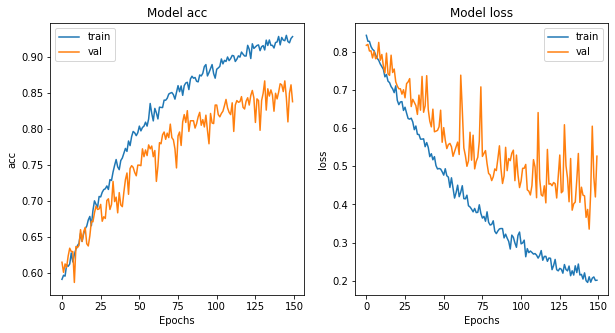

In [ ]:
#Plotting the trend of the metrics during training
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
train_scores = model.evaluate(train_generator)
val_scores = model.evaluate(val_generator)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))

41/41 [==============================] - 3s 83ms/step - loss: 0.5265 - acc: 0.8376
Training Accuracy: 92.75%
Validation Accuracy: 83.76%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model.predict(val_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    MildDemented       0.97      0.63      0.76       180
ModerateDemented       1.00      0.85      0.92        13
     NonDemented       0.84      0.93      0.88       640
VeryMildDemented       0.79      0.79      0.79       448

        accuracy                           0.84      1281
       macro avg       0.90      0.80      0.84      1281
    weighted avg       0.84      0.84      0.83      1281

